In [1]:
#Simple program to create word cloud by reading text 

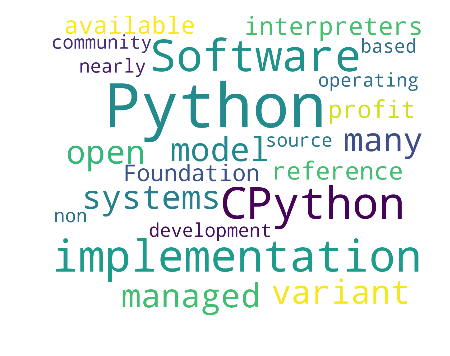

In [2]:
from os import path, getcwd
from PIL import Image
import wikipedia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

text= ("Python interpreters are available for many operating systems. CPython, the reference implementation of Python, is open source software[28] and has a community-based development model, as do nearly all of its variant implementations. CPython is managed by the non-profit Python Software Foundation.")

wc = WordCloud(stopwords = STOPWORDS,
               background_color = 'white',
               width = 1200,
               height = 1000,
               mode="RGB"
              ).generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

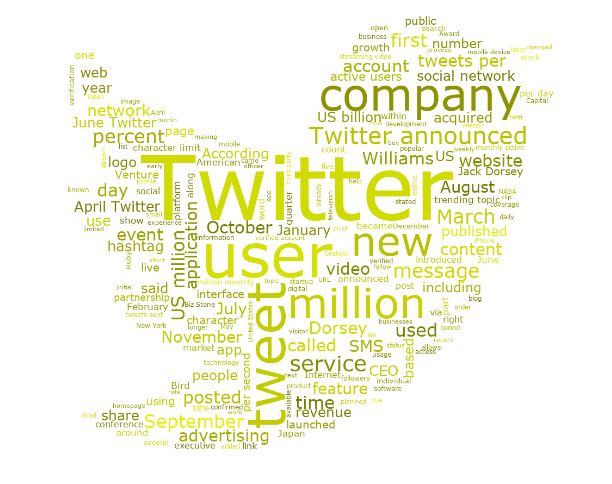

In [3]:
#let's go a step ahead and see how we can read data from a text file, set fonts and word cloud shapes
def color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

#open and read the text file for the file loaction 
text = open ("twitter.txt").read()
twitter = np.array(Image.open("twitter.png"))

#download the font of your choice and give the font path
#http://www.fontpalace.com/font-download/Verdana/
wc = WordCloud(font_path = r'Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            mask = twitter,
                            color_func = color_func
                            ).generate(text)
image_colors = ImageColorGenerator(twitter)
wc.to_file("twitter_wordcloud.png")
plt.figure(figsize=[7,7])
plt.imshow(wc)
plt.axis('off')
plt.show()

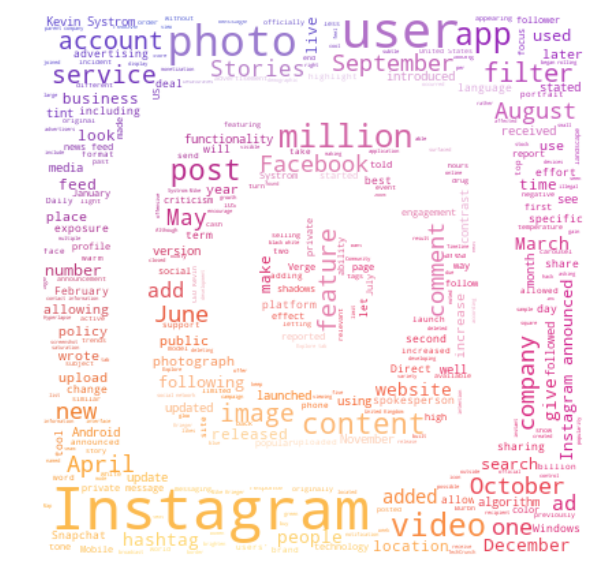

In [4]:
#Reading the data from wikipedia
# get best matching title for given query
query ="Instagram"
title = wikipedia.search(query)[0]
# get wikipedia page for selected title
page = wikipedia.page(title)
text = page.content
#see the content here
#print(get_wiki("Instagram"))
#open and read the text file for the file loaction 
instagram = np.array(Image.open("instagram.jpg"))
#Generate word cloud
wc = WordCloud(background_color="white",
               max_words=1000, 
               mask=instagram,
               max_font_size=90, 
               random_state=42
              ).generate(text)
#save word cloud image 
wc.to_file("instagram_wordcloud.png")
# create coloring from image
image_colors = ImageColorGenerator(instagram)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

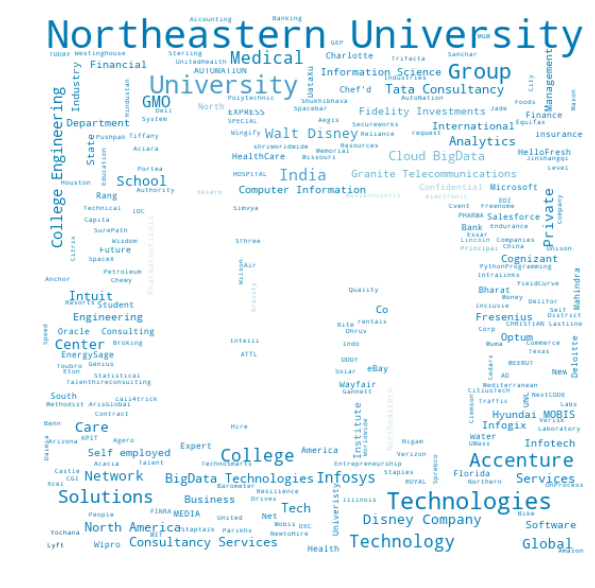

In [5]:
#Reading my linked in data from Connections.csv file
#linkedin connections wordcloud

from os import path, getcwd
from PIL import Image
import wikipedia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
df = pd.read_csv(r"Connections.csv", encoding ="latin-1")
text = ' '
for val in df.Company:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
         
    for words in tokens:
        text = text + words + ' '
        #text = open("C:\\Users\\kamal\\Desktop\\DSP\\linkedinarticle\\instagram.txt").read()
        linkedin = np.array(Image.open("C:\\Users\\kamal\\Desktop\\DSP\\linkedinarticle\\linkedin.png"))
        stopwords = set(STOPWORDS)
        stopwords.add("LLC")
        stopwords.add("Inc")
        stopwords.add("Pvt")
        stopwords.add("Limited")
        stopwords.add("Ltd")
        wc = WordCloud(background_color="white",
                       max_words=1000, 
                       mask=linkedin,
                       max_font_size=90, 
                       random_state=42,
                      ).generate(text)
        wc.to_file("C:\\Users\\kamal\\Desktop\\DSP\\linkedinarticle\\linkedin_wordcloud1.png")
        image_colors = ImageColorGenerator(linkedin)
        plt.figure(figsize=[7,7])
        plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        plt.show()